##**Notebook PC#09 - Part 2**
## Autoencoder training and manifold visualization for the MNIST database.
## Code produced by previous students of IA353. Thank you for making PC#09 (Part 2) still more complete and informative.

**Professor:** Fernando J. Von Zuben <br>
**Aluno(a):** Taylon Luan Congio Martins RA: 177379<br>
**Aluno(a):** Tiago C A Amorim RA: 100675

### Loading the main libraries

In [ ]:
import tensorflow as tf
import os

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.keras import TqdmCallback

from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, Input, Conv2DTranspose, Reshape
from tensorflow.keras.optimizers import Adam
from keras.utils import to_categorical
import tensorflow as tf

from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))

### Reading the data

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.
X = x_train.reshape((x_train.shape[0], -1))

### Convolutional Autoencoder

The dense layers of Part 1 were replaced by convolutional layers, which promotes a reduction in the total number of adjustable weights.

In [ ]:
encoder = tf.keras.models.Sequential([
    Conv2D(8, (3, 3), activation='selu', padding='same', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2), padding='same'),
    Conv2D(16, (3, 3), activation='selu', padding='same'),
    MaxPooling2D((2, 2), padding='same'),
    Conv2D(32, (3, 3), activation='selu', padding='same'),
    MaxPooling2D((2, 2), padding='same'),
    Conv2D(64, (3, 3), activation='selu', padding='same'),
    MaxPooling2D((2, 2), padding='same'),
    Conv2D(128, (3, 3), activation='selu', padding='same'),
    MaxPooling2D((2, 2), padding='same'),
    Conv2D(256, (3, 3), activation='selu', padding='same'),
    Flatten(),
    Dense(2),

], name='encoder')

# Define the decoder
decoder = tf.keras.models.Sequential([
    Dense(256, activation='relu'),
    Reshape((1, 1, 256)),
    Conv2DTranspose(128, (3, 3), strides=(2, 2), activation='selu'),
    Conv2DTranspose(64, (3, 3), strides=(2, 2), activation='selu'),
    Conv2DTranspose(32, (3, 3), strides=(2, 2), padding='same', activation='selu'),
    Conv2DTranspose(16, (3, 3), strides=(2, 2), padding='same', activation='selu'),
    Conv2D(8, (3, 3), padding='same', activation='selu'),
    Conv2D(1, (3, 3), padding='same', activation=None),
], name='decoder')

autoencoder = Sequential([encoder, decoder])
autoencoder.summary(expand_nested=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder (Sequential)        (None, 2)                 393922    
|¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯|
| conv2d (Conv2D)            (None, 28, 28, 8)         80       |
|                                                               |
| max_pooling2d (MaxPooling  (None, 14, 14, 8)         0        |
| 2D)                                                           |
|                                                               |
| conv2d_1 (Conv2D)          (None, 14, 14, 16)        1168     |
|                                                               |
| max_pooling2d_1 (MaxPooli  (None, 7, 7, 16)          0        |
| ng2D)                                                         |
|                                                               |
| conv2d_2 (Conv2D)          (None, 7, 7, 32)          4

In [ ]:
autoencoder.compile(optimizer = "adam", loss = "mse")

history = autoencoder.fit(x_train.reshape((-1, 28, 28, 1)), x_train.reshape((-1, 28, 28, 1)), batch_size = 128, epochs = 20, verbose = 0, callbacks=[TqdmCallback(verbose=1)])

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

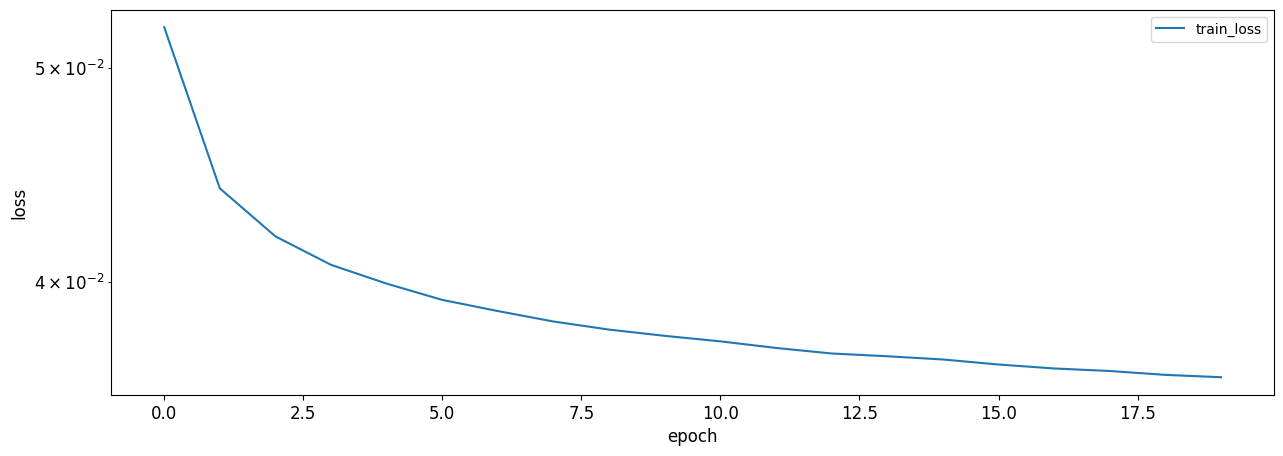

In [ ]:
plot_df = pd.DataFrame.from_dict({'train_loss':history.history['loss']})
plot_df.plot(logy=True, figsize=(15,5), fontsize=12)
plt.xlabel('epoch', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.show()

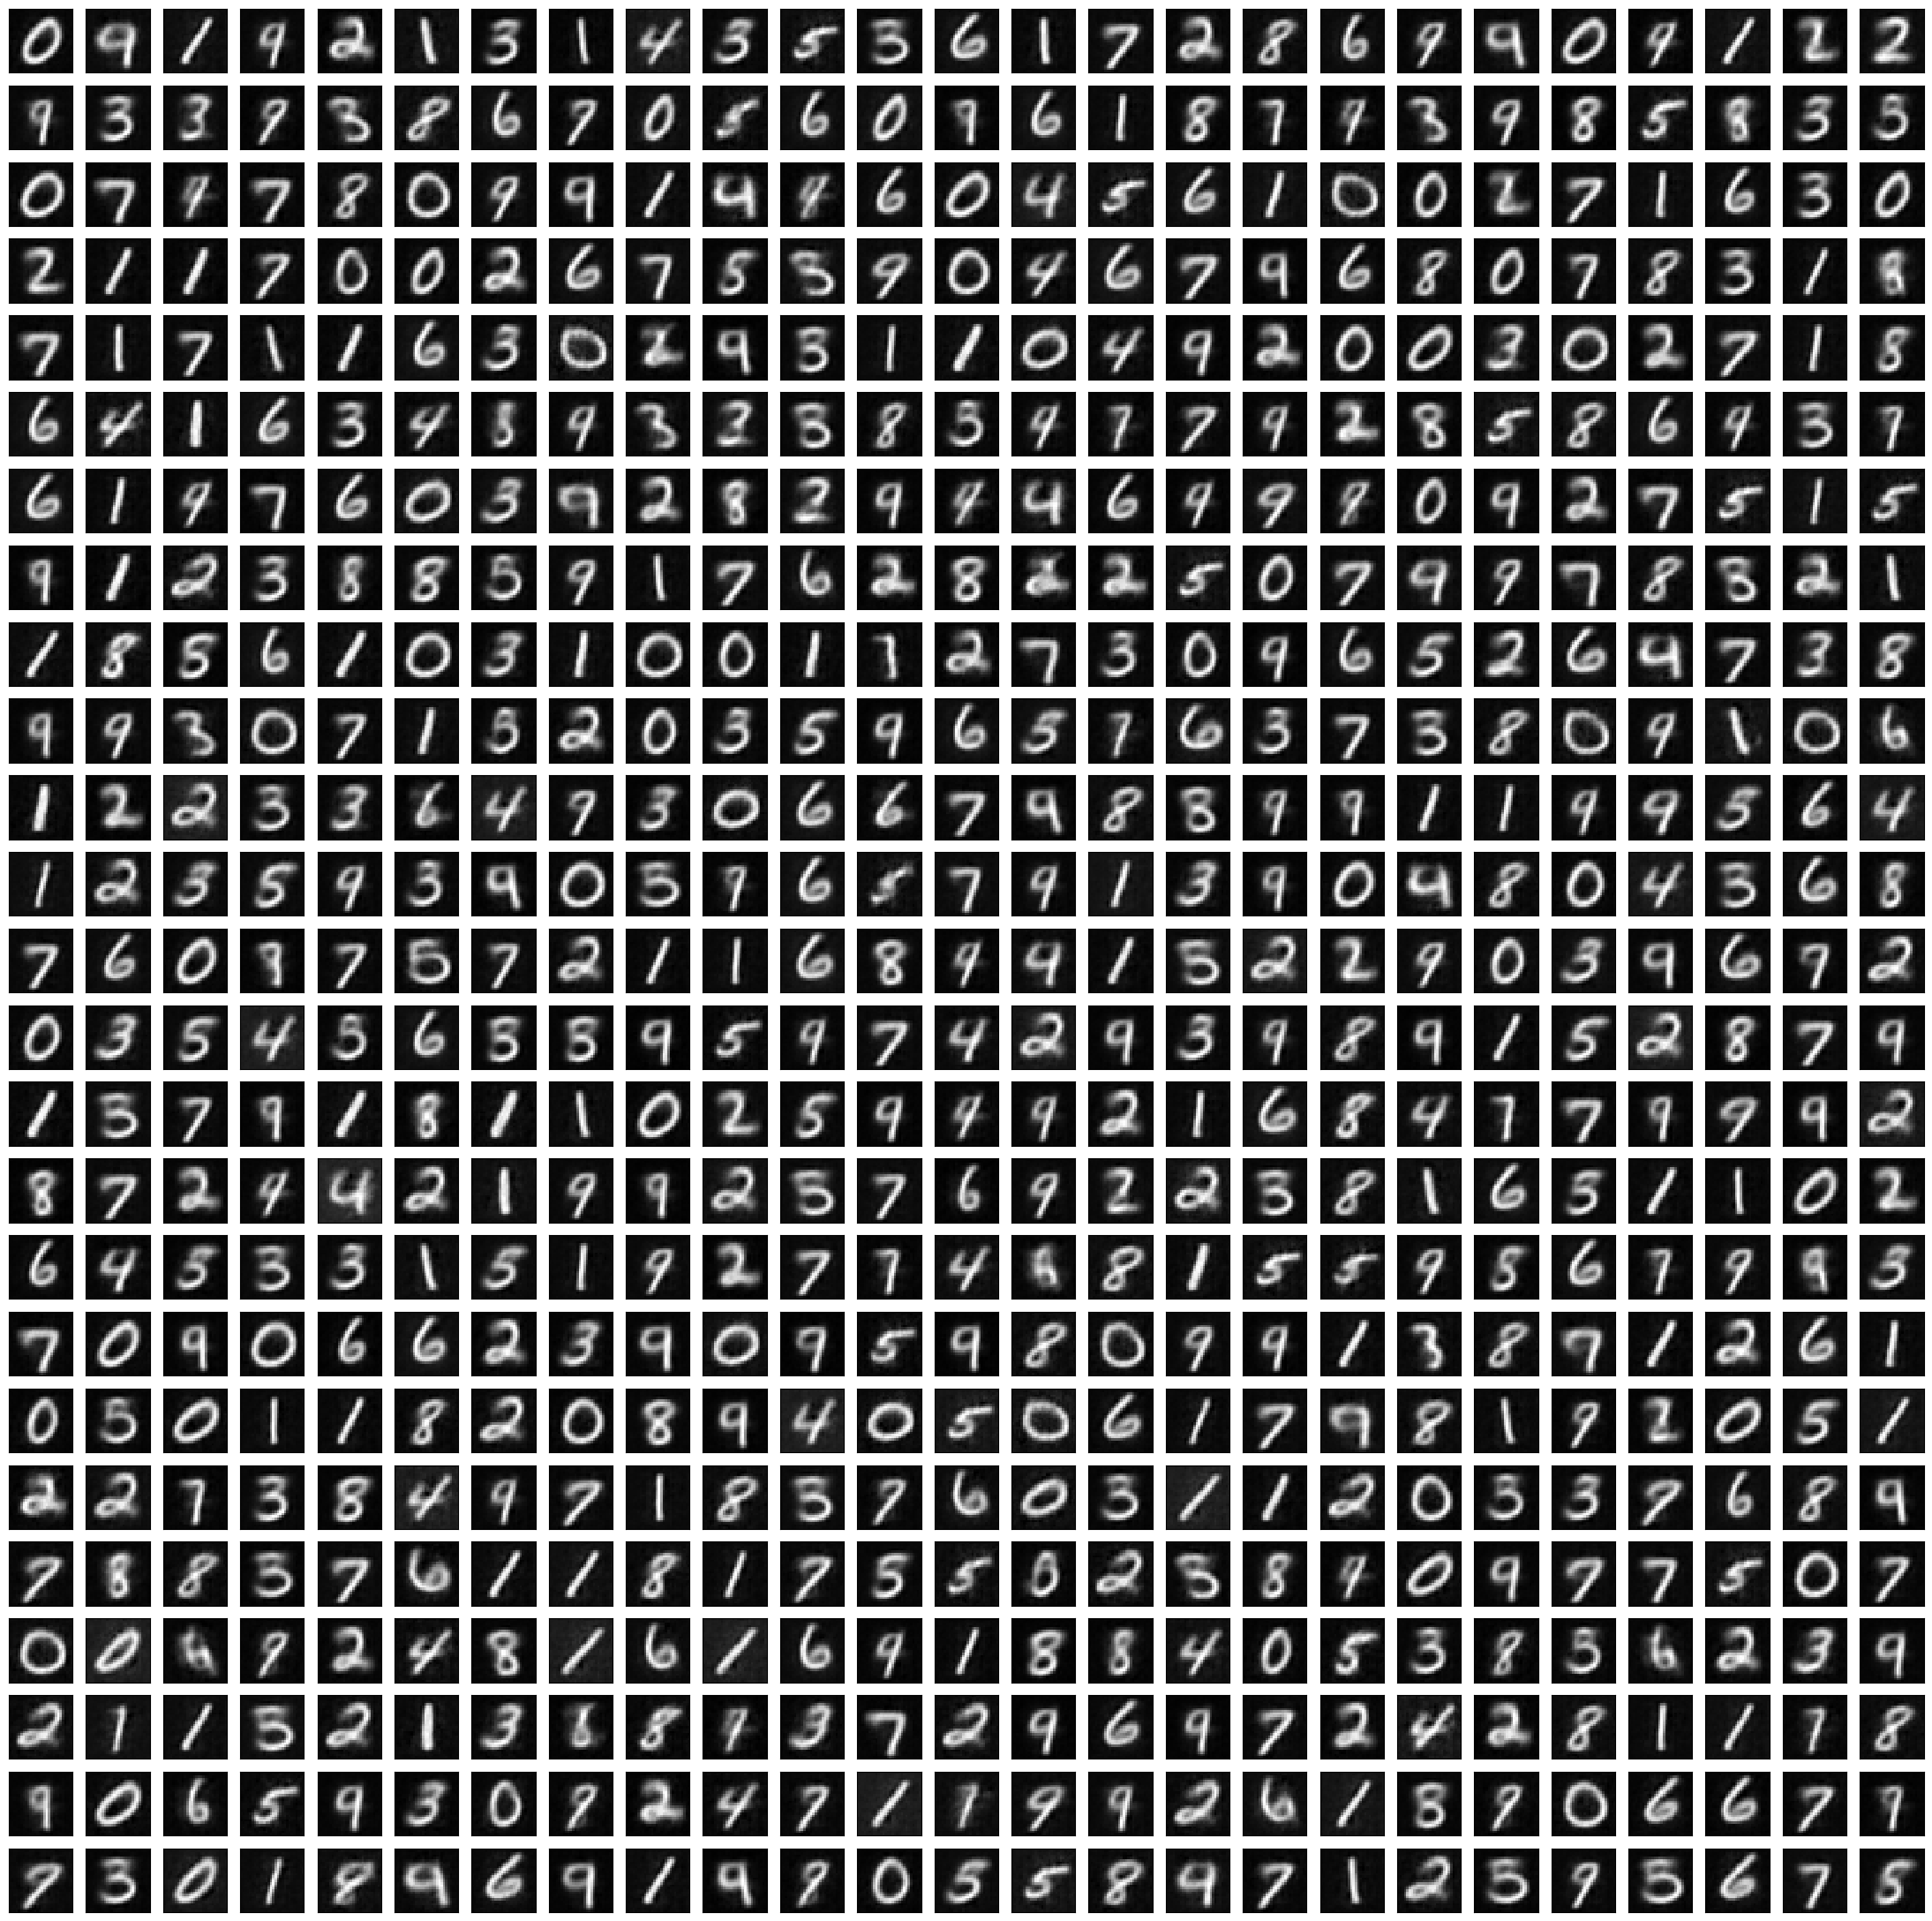

In [ ]:
fig = plt.figure(figsize=(28,28))

decoded_images = autoencoder.predict(X[:26*26].reshape((-1, 28, 28, 1)), verbose=False)

ind = 1
for i in range(1, 26, 1):
    for j in range(1, 26, 1):
        fig.add_subplot(25, 25, ind)
        plt.imshow(decoded_images[ind].reshape((28,28)), cmap = "gray", interpolation = "none")
        plt.xticks([])
        plt.yticks([])
        ind+=1

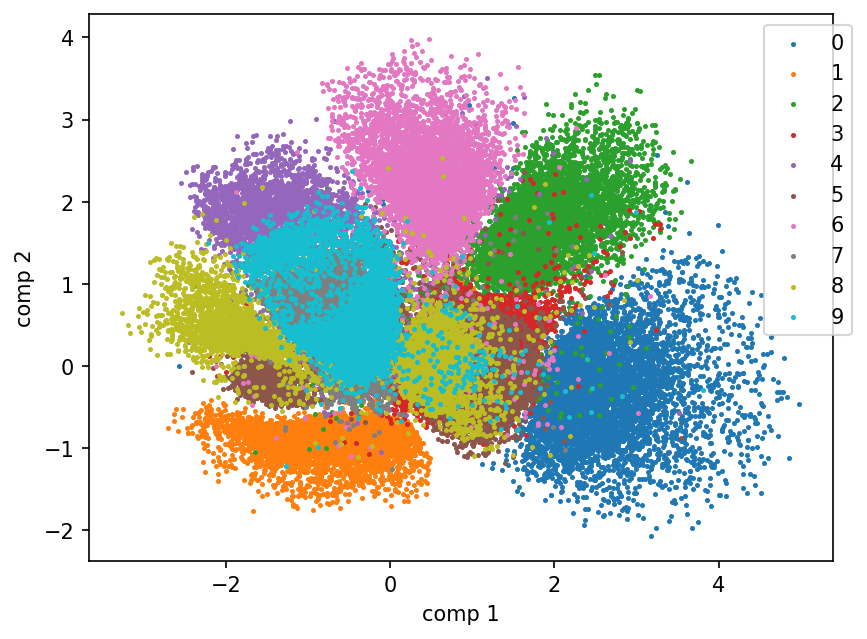

In [ ]:
fig, ax = plt.subplots(dpi=150)

x_proj = encoder.predict(X.reshape((-1, 28, 28, 1)), verbose=0)

for i in range(10):
    ax.scatter(*x_proj[y_train == i].T, label=i, s=2)


ax.legend(bbox_to_anchor=(1.04, 1))
ax.set_xlabel('comp 1')
ax.set_ylabel('comp 2')
ax.set_aspect('equal', 'box')

plt.show()

<font color="green">
Atividade (a) <br>
Compare a disposição dos códigos de dígitos das 10 classes com aquela da Parte 1. Procure justificar a diferença nos resultados.
</font>

**Resposta:** <br>
As classes estão mais separadas na representação que o autoenconder convolucional aprendeu para o manifold do que na representação aprendida pelas camadas densas (PC09 parte 1). Isto é explicado pela maior capacidade em trabalhar com imagens (no caso, MNIST) das camadas convolucionais, pois essas camadas conseguem capturar hierarquias espaciais, padrões locais da imagem e são invariantes à translações da imagem, além de utilizarem menor quantidade de pesos, conseguindo uma melhor representação das imagens no espaço latente.


In [ ]:
def circle_path(radius, center, n_images, ax, *args, **kwargs):
    x0, y0 = center

    pts = np.zeros((n_images, 2))
    pts[:, 0] = radius * np.cos(2 * np.pi * np.linspace(1, n_images, num=n_images)/n_images) + x0
    pts[:, 1] = radius * np.sin(2 * np.pi * np.linspace(1, n_images, num=n_images)/n_images) + y0

    path = decoder.predict(pts, verbose=0).reshape((-1, 28, 28))

    for i in range(n_images):
        ax.add_artist(AnnotationBbox(OffsetImage(path[i], cmap='binary_r', zoom=0.4), pts[i], frameon=False))

In [ ]:
def clear_artists(ax):
    for artist in ax.artists:
        artist.remove()

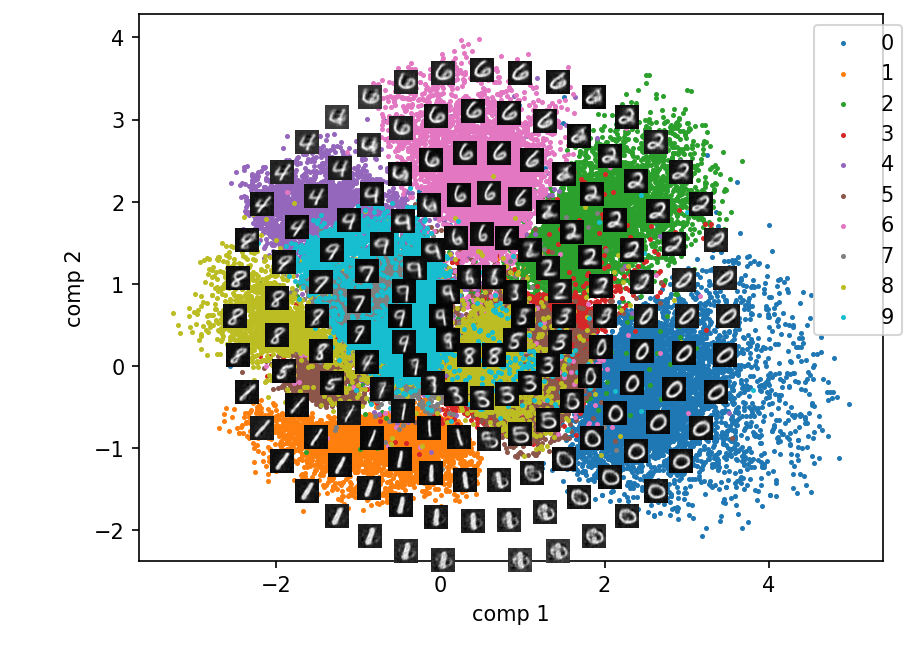

In [ ]:
clear_artists(ax)

circle_path(radius=3, center=(0.5, 0.6), n_images=40, ax=ax)
circle_path(radius=2.5, center=(0.5, 0.6), n_images=35, ax=ax)
circle_path(radius=2, center=(0.5, 0.6), n_images=30, ax=ax)
circle_path(radius=1.5, center=(0.5, 0.6), n_images=25, ax=ax)
circle_path(radius=1, center=(0.5, 0.6), n_images=20, ax=ax)
circle_path(radius=0.5, center=(0.5, 0.6), n_images=10, ax=ax)

fig

<font color="green">
Atividade (b) <br>
Se necessário, redefina os valores de [center], [radius] e [n_images] para que as amostras excursionem por toda a distribuição de códigos. Em outras palavras, não deixe nenhuma região colorida sem amostras.
</font>

### Pre-trained convolutional autoencoder

The idea here is to force the encoder to separate the data before the decoder tries to decode the latent space. To do this, we will pre-train the encoder as a classifier, in a supervised manner. After this encoder pre-training, we will pre-train the decoder to decode in this latent space learned by the classifier, freezing the encoder weights. The decoder will present low performance in this pre-training stage, given that the encoder is not flexible. Finally, to improve overall performance, we will fine-tune the entire autoencoder.

In [ ]:
encoder = tf.keras.models.Sequential([
    Conv2D(8, (3, 3), activation='selu', padding='same', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2), padding='same'),
    Conv2D(16, (3, 3), activation='selu', padding='same'),
    MaxPooling2D((2, 2), padding='same'),
    Conv2D(32, (3, 3), activation='selu', padding='same'),
    MaxPooling2D((2, 2), padding='same'),
    Conv2D(64, (3, 3), activation='selu', padding='same'),
    MaxPooling2D((2, 2), padding='same'),
    Conv2D(128, (3, 3), activation='selu', padding='same'),
    MaxPooling2D((2, 2), padding='same'),
    Conv2D(256, (3, 3), activation='selu', padding='same'),
    Flatten(),
    Dense(2),

], name='encoder')

# Define the decoder
decoder = tf.keras.models.Sequential([
    Dense(256, activation='relu', input_shape=(2,)),
    Reshape((1, 1, 256)),
    Conv2DTranspose(128, (3, 3), strides=(2, 2), activation='selu'),
    Conv2DTranspose(64, (3, 3), strides=(2, 2), activation='selu'),
    Conv2DTranspose(32, (3, 3), strides=(2, 2), padding='same', activation='selu'),
    Conv2DTranspose(16, (3, 3), strides=(2, 2), padding='same', activation='selu'),
    Conv2D(8, (3, 3), padding='same', activation='selu'),
    Conv2D(1, (3, 3), padding='same', activation=None),
], name='decoder')

In [ ]:
pre_train_encoder = Sequential([encoder, Dense(10, 'softmax')])

pre_train_encoder.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

history = pre_train_encoder.fit(X.reshape((-1, 28, 28, 1)), y_train, batch_size = 128, epochs = 20, verbose = 0, callbacks=[TqdmCallback(verbose=1)])

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

In [ ]:
pre_train_decoder = Sequential([decoder])

x_proj = encoder.predict(X.reshape((-1, 28, 28, 1)), verbose=0)

pre_train_decoder.compile(optimizer='adam', loss='mse')

history = pre_train_decoder.fit(x_proj, X.reshape((-1, 28, 28, 1)), batch_size = 128, epochs = 20, verbose = 0, callbacks=[TqdmCallback(verbose=1)])

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

In [ ]:
autoencoder = Sequential([encoder, decoder])

autoencoder.compile(optimizer = Adam(learning_rate=1e-10), loss='mse')

history = autoencoder.fit(X.reshape((-1, 28, 28, 1)), X.reshape((-1, 28, 28, 1)), batch_size = 128, epochs = 50, verbose = 0, callbacks=[TqdmCallback(verbose=1)])

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

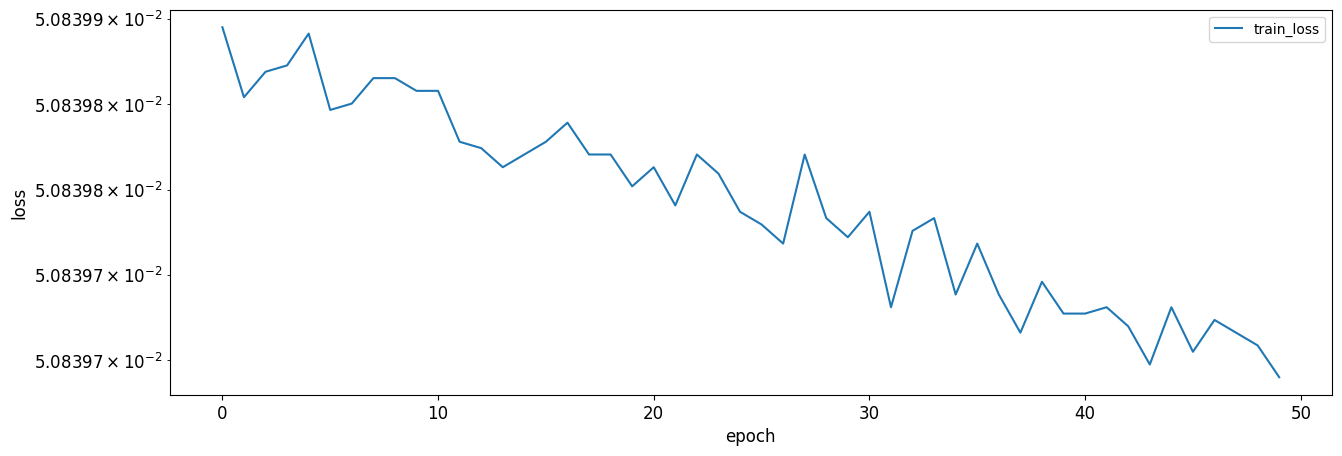

In [ ]:
plot_df = pd.DataFrame.from_dict({'train_loss':history.history['loss']})
plot_df.plot(logy=True, figsize=(15,5), fontsize=12)
plt.xlabel('epoch', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.show()

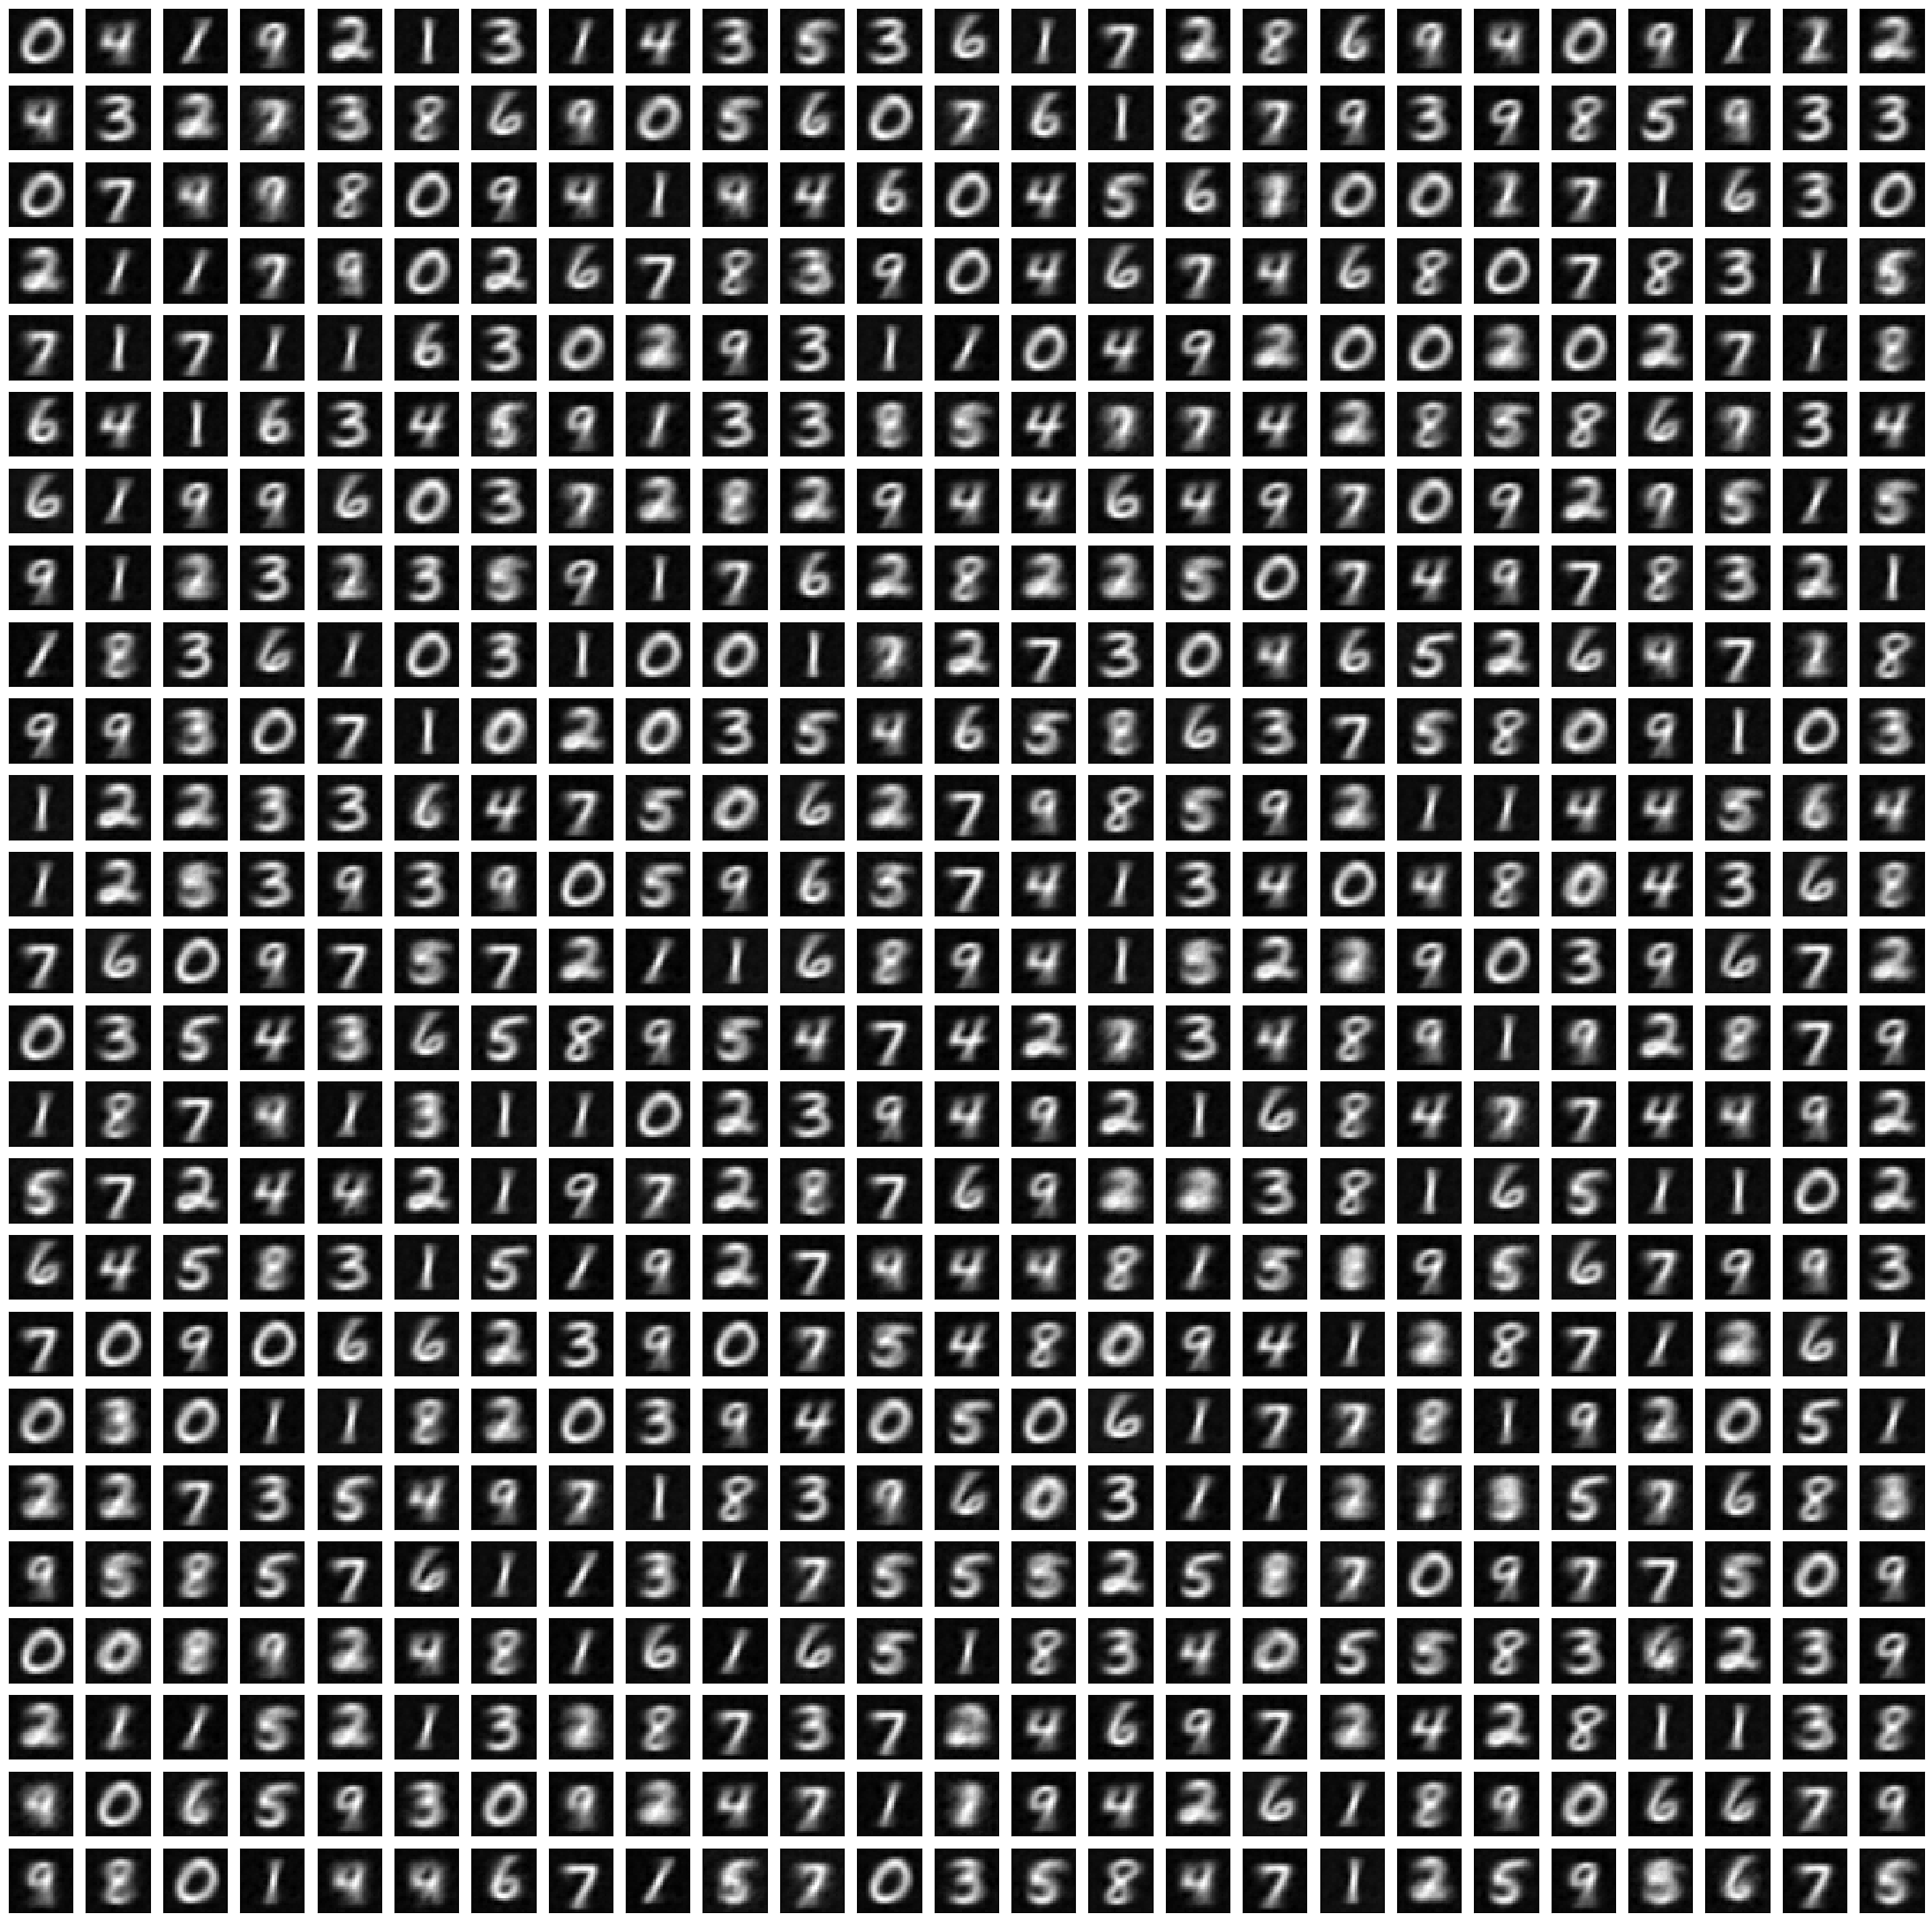

In [ ]:
fig = plt.figure(figsize=(28,28))

decoded_images = decoder.predict(x_proj, verbose=False)

ind = 1
for i in range(1, 26, 1):
    for j in range(1, 26, 1):
        fig.add_subplot(25, 25, ind)
        plt.imshow(decoded_images[ind].reshape((28,28)), cmap = "gray", interpolation = "none")
        plt.xticks([])
        plt.yticks([])
        ind+=1

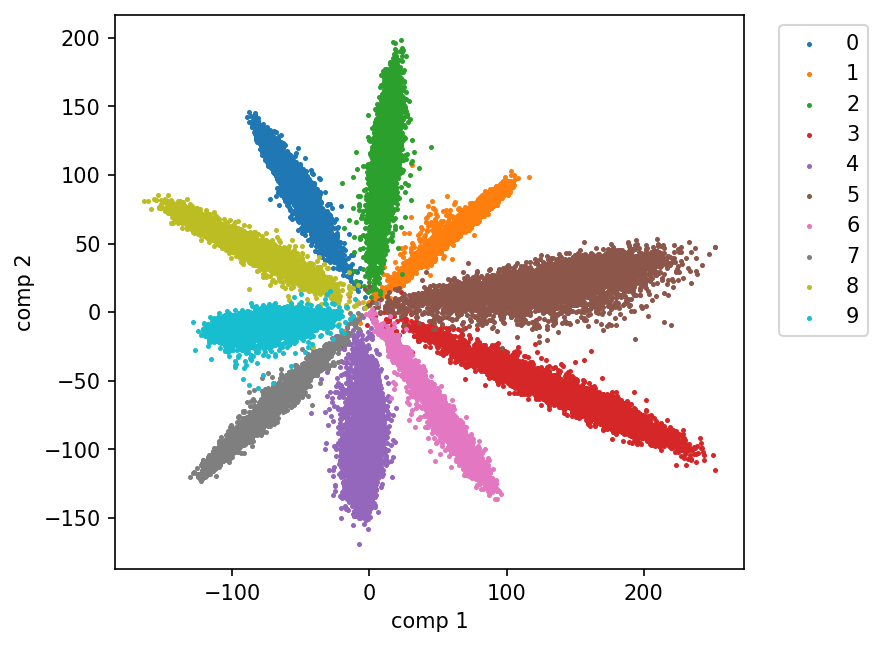

In [ ]:
fig, ax = plt.subplots(dpi=150)

for i in range(10):
    ax.scatter(*x_proj[y_train == i].T, label=i, s=2)


ax.legend(bbox_to_anchor=(1.04, 1))
ax.set_xlabel('comp 1')
ax.set_ylabel('comp 2')
ax.set_aspect('equal', 'box')

plt.show()

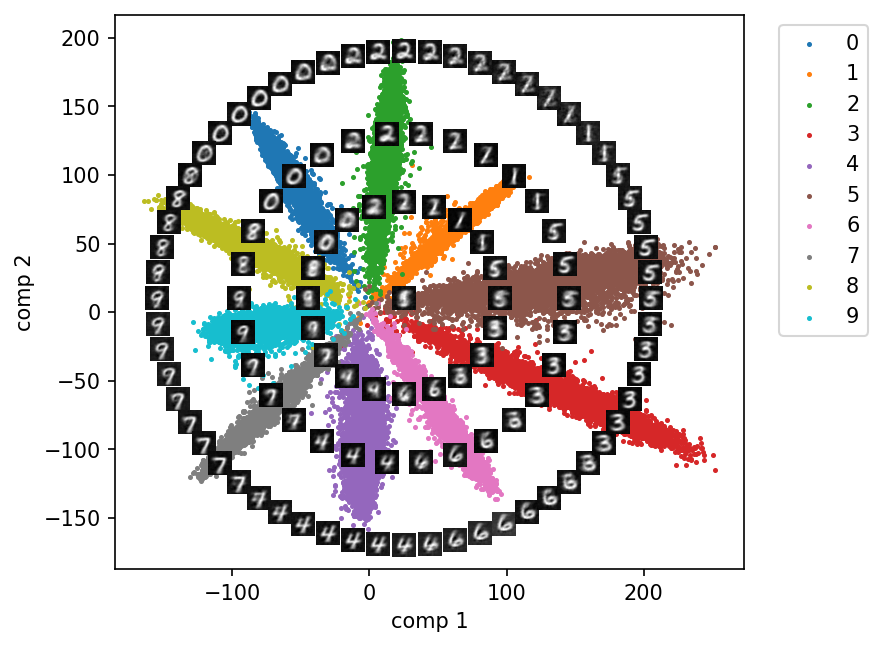

In [ ]:
clear_artists(ax)

circle_path(radius=180, center=(25, 10), n_images=60, ax=ax)
circle_path(radius=120, center=(25, 10), n_images=30, ax=ax)
circle_path(radius=70, center=(25, 10), n_images=20, ax=ax)
circle_path(radius=0, center=(25, 10), n_images=1, ax=ax)

fig

<font color="green">
Atividade (c) <br>
Se necessário, redefina os valores de [center], [radius] e [n_images] para que as amostras excursionem por toda a distribuição de códigos. Em outras palavras, não deixe nenhuma região colorida sem amostras.
</font>

<font color="green">
Atividade (d) <br>
Qual foi a estratégia adotada para que o código do autoencoder fizesse o desemaranhamento (disentanglement) das classes? É sempre possível adotar esta estratégia ao se treinar um autoencoder?
</font>

**Resposta:**<br>
A ideia é utilizar um encoder pré-treinado. O encoder é forçado a separar os dados antes do decoder decodificar o espaço latente. Para isso, o encoder é pré-treinado como um classificador de forma supervisionada, depois disso, o decoder é pré-treinado para decodificar esse espaço latente aprendido pelo classificador, congelando os pesos aprendidos pelo encoder.

A possibilidade de utilizar essa estratégia depende da base de dados, no caso, a base MNIST possui labels para cada imagem, o que permite realizar o pré-treinamento de forma supervisionado no encoder. Se não for possível realizar o treinamento de forma supervisionado, como no caso de dados sem rótulo (unlabeled), não é possível realizar o pré-treinamento do encoder como um classificador, tendo que recorrer à técnicas como aprendizado autosupervisionado para a criação de pseudo-labels.